# `Legend`: criando legendas em um plot
- No Notebook sobre `Line2D` você já viu uma maneira simples de adicionar uma legenda em um plot
- Daquela maneira já suficiente para 99% dos casos
- Porém, aqui estamos interessados em como funciona por baixo dos panos
- Além do que podemos editar bastante coisa em uma legenda (caso seja necessario)    

In [1]:
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
from matplotlib.patches import Rectangle

- **Vamos criar um plot com retangulos para exemplificar**:

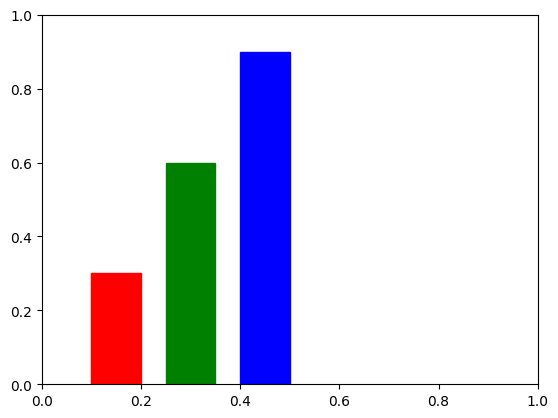

In [2]:
rec1 = Rectangle((0.1, 0), 0.1, 0.3, label='Dia 1')
rec2 = Rectangle((0.25, 0), 0.1, 0.6, label='Dia 2')
rec3 = Rectangle((0.4, 0), 0.1, 0.9, label='Dia 3')

fig, ax = plt.subplots()

ax.add_patch(rec1)
ax.add_patch(rec2)
ax.add_patch(rec3)

# Vamos setar as cores da seguinte forma:
colors=['red','green','blue']
for p, c in zip(ax.patches, colors):
    p.set_color(c)

- Para criar uma legenda, a bilioteca utiliza a classe `Legend`
- A maneira manual de fazer isso seria:

In [3]:
# O atributo handles recebe o que já foi adicionado no `Axes` que desejamos adicionar na legenda
handles = [ax.patches[0], ax.patches[1], ax.patches[2]]

# O atributo labels recebe o que será escrito na legenta. É uma lista de strings. Aqui, estamos pegando direto do que foi definido em cada um dos
# retangulos, mas nada impede de ser um lista como ["Dia 1", "Dia 2", "Dia 3"]
labels = [ax.patches[0].get_label(),ax.patches[1].get_label(), ax.patches[2].get_label()]

# Criando a legenda
legend = Legend(ax, handles=handles, labels=labels)

- **Adicionando uma legenda no `Axes`**
    - Diferentemente das linhas, patches e textos, não existe um método de `add` apenas para legenda
    - Precisamos usar o `add_artistic()`
    - Na verdade, para qualquer `Artistic` que não possui um método dedicado, podemos usar este método

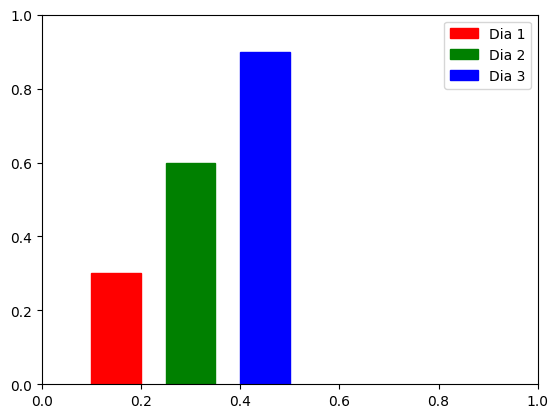

In [4]:
ax.add_artist(legend)
fig

- **Uma maneira mais simples de obter os handles e os labels é usando o método `ax.get_legend_handles_labels()`**

In [5]:
handles, labels = ax.get_legend_handles_labels()
print(labels)
handles

['Dia 1', 'Dia 2', 'Dia 3']


- **E uma outra maneira mais simples de adicionar a legenda no plot é usando o `ax.legend()`**
    - Esse método faz exatamente o que fizemos nos passos anteriores
    - Cria a instância de `Legend` e adiciona ela no `Artist`

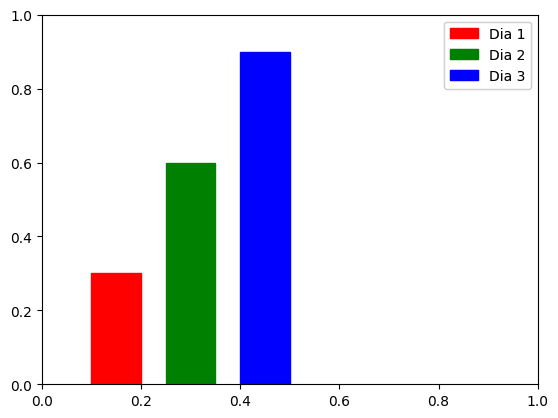

In [6]:
ax.legend(handles=handles, labels=labels) 
fig

- Se você já tiver setados os labels e cores na construção do plot (neste caso, do retangulo), é ainda mais simples
- Basta chamar `ax.legend()` que o método já faz tudo por baixo dos panos

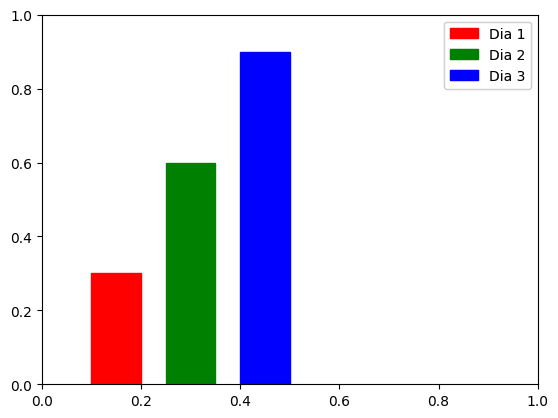

In [7]:
ax.legend()
fig

## Customizando legendas
- Se temos controle sob o objeto criado para gerar uma legenda, podemos customizar bastante ela
- É isso que vamos fazer nas próximas células, mas antes, vamos aumentar nosso espaço da figura

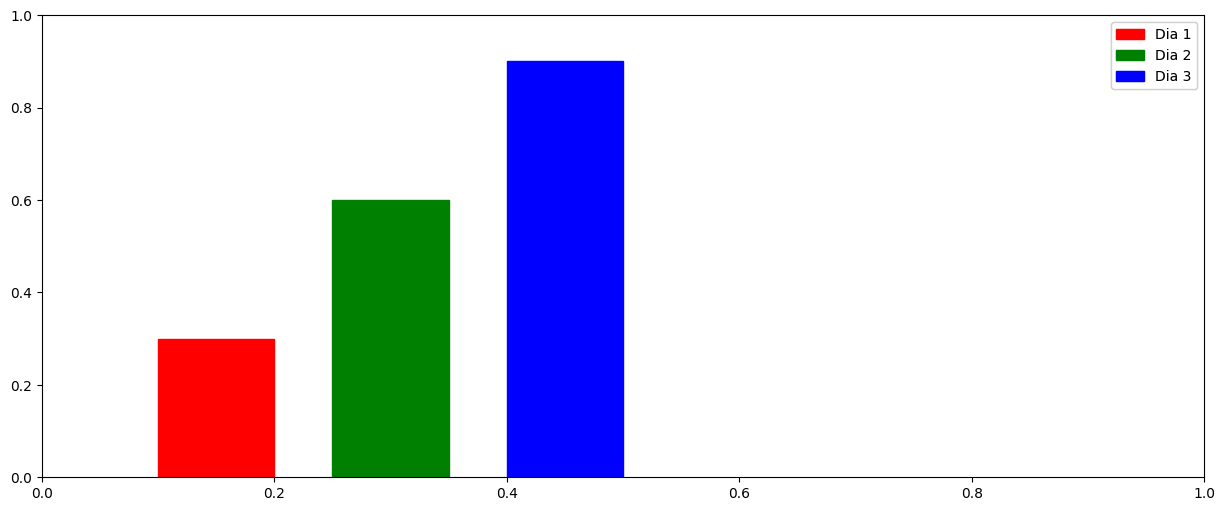

In [8]:
fig.set_size_inches((15, 6))
fig

- Podemos editar o box que envolve a legenda:

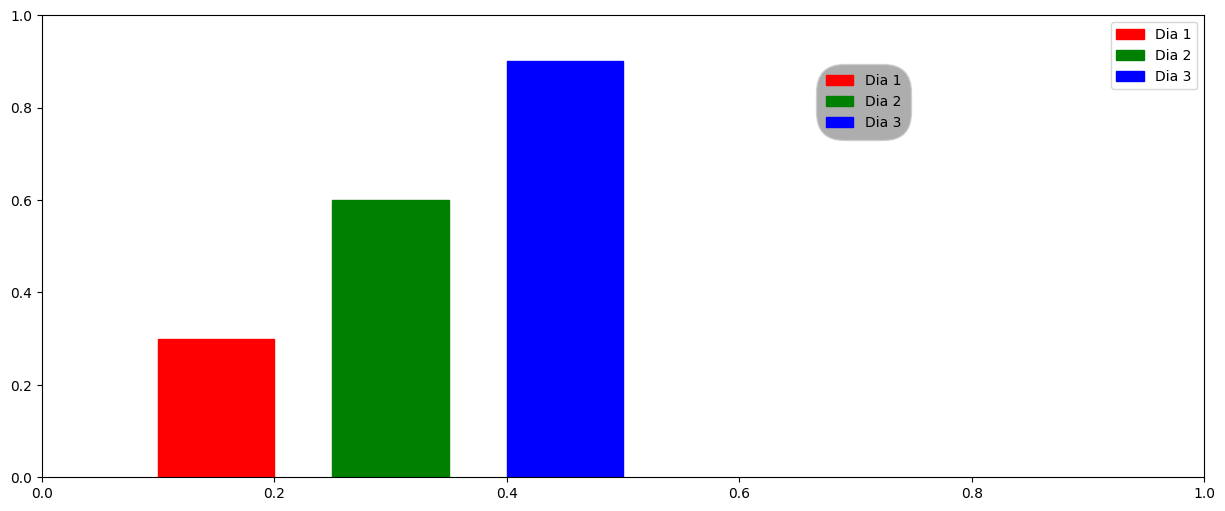

In [9]:
legend.legendPatch.set_boxstyle('round, pad=0.3, rounding_size=2') # alterando o estilo do box
legend.legendPatch.set_facecolor('#999') # alterando a cor
legend.set_bbox_to_anchor([0.75, 0.9]) # alterando a posição
fig

- Também podemos alterar as informações especificas de um dos handles e/ou labels

/tmp/ipykernel_25046/1760889727.py:2: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[2].set(facecolor='r', alpha=0.2)


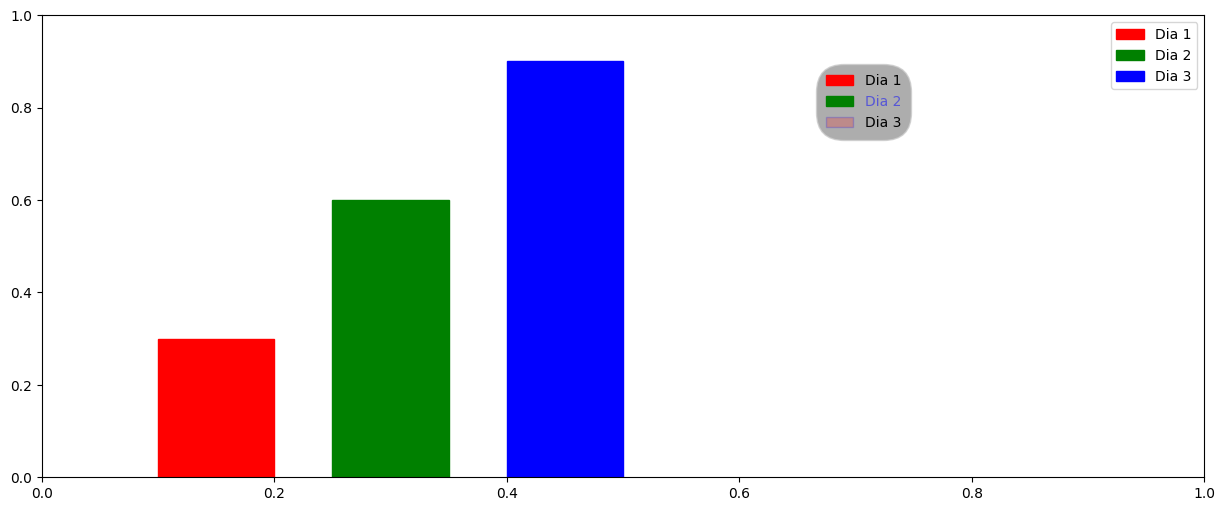

In [10]:
legend.texts[1].set(color='b', alpha=0.5)
legend.legendHandles[2].set(facecolor='r', alpha=0.2)
fig

- **Podemos adicionar outras legendas**:

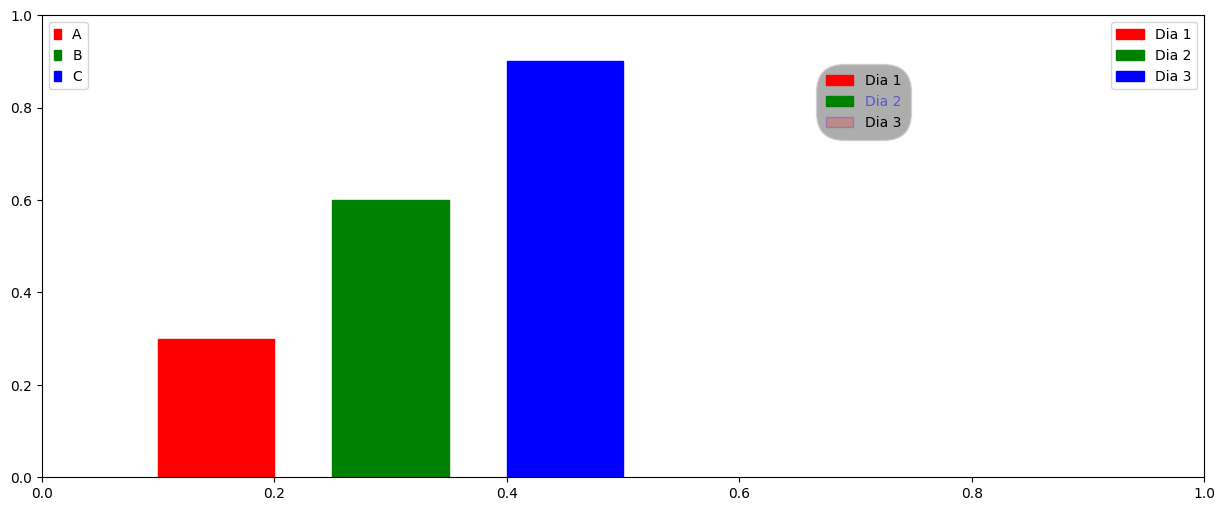

In [11]:
legend2 = Legend(ax, handles=handles, labels=["A", "B", "C"], loc=2, handlelength=0.5)
ax.add_artist(legend2)
fig

- ...Ou, simplesmente:

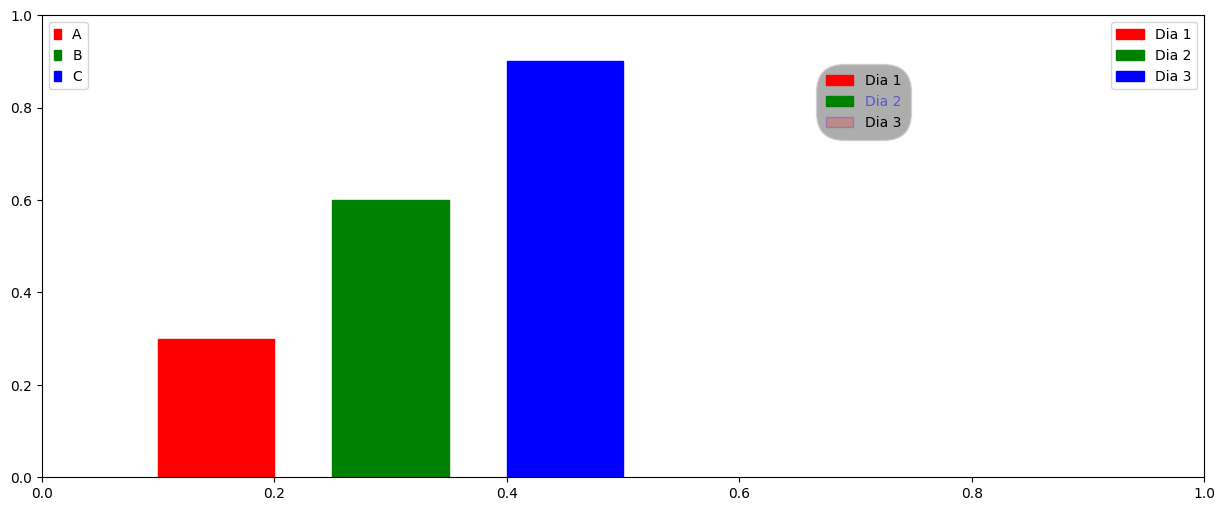

In [12]:
ax.legend(handles=handles)
fig